In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mu2(x):
    return [1 / (1 + ((x_ - 20) / 10) ** 10) for x_ in x]
    
def mu1(t, c):
    return mu2(-c * t)[0]
    
def f(t, x):
    return 0

def composit(x, t, c):
    u = np.zeros((len(t), len(x)))
    
    # граничные
    for i in range(len(t)):
        u[i][0] = mu1(t, c)
        
    # начальные
    u[0] = mu2(x)
    
    for i in range(1, len(t)):
        for j in range(1, len(x)):
            tau = t[i] - t[i-1]
            h = x[j] - x[j-1]
            
            # число Куранта
            k = c * tau / h
            
            if k <= 1:
                u[i][j] = f(t[i] + tau/2, x[j] - h/2) * tau - c * (u[i-1][j] - u[i-1][j-1]) * tau / h + u[i-1][j]
            else:
                u[i][j] = (f(t[i] + tau/2, x[j] - h/2) * h - (u[i][j-1] - u[i-1][j-1])*h / tau + c * u[i][j-1]) / c
    return u

def implicit(x, t, c):
    u = np.zeros((len(t), len(x)))
    
    # граничные
    for i in range(len(t)):
        u[i][0] = mu1(t, c)
        
    # начальные
    u[0] = mu2(x)

    for i in range(1, len(t)):
        for j in range(1, len(x)):
            tau = t[i] - t[i-1]
            h = x[j] - x[j-1]
            u[i][j] = (f(t[i] + tau / 2, x[j] - h/2) * tau * h + h * u[i-1][j] + c * tau * u[i][j-1]) / (h + c * tau)
    return u
    
def half_sum(x, t, c):
    u = np.zeros((len(t), len(x)))
    
    # граничные
    for i in range(len(t)):
        u[i][0] = mu1(t, c)
        
    # начальные
    u[0] = mu2(x)
    
    for i in range(1, len(t)):
        for j in range(1, len(x)):
            tau = t[i] - t[i-1]
            h = x[j] - x[j-1]
            u[i][j] = (2 * f(t[i] + tau / 2, x[j] - h / 2) * tau * h - h * (u[i][j-1] - u[i-1][j] - u[i-1][j-1] ) - tau * c * (u[i-1][j] - u[i][j-1] - u[i-1][j-1])) / (h + c * tau)
    return u

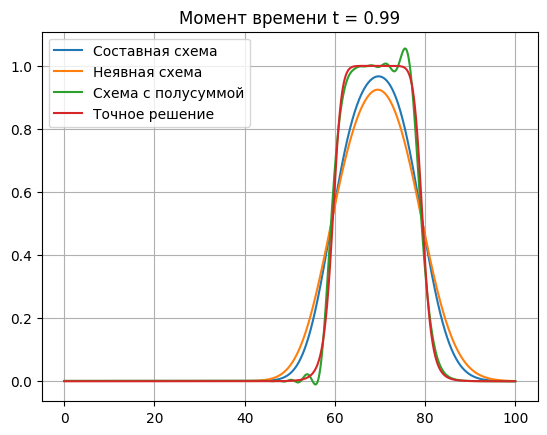

In [9]:
border_x = (0, 100)
border_t = (0, 1)
h = 0.1
tau = 0.01

x = np.arange(border_x[0], border_x[1] + h, h)
t = np.arange(border_t[0], border_t[1], tau)
c = 50

time_moment = 99

scheme_1 = composit(x, t, c)
scheme_2 = implicit(x, t, c)
scheme_3 = half_sum(x, t, c)
exact = mu2(x - t[time_moment]*c)


plt.title(f"Момент времени t = {t[time_moment]}")
plt.plot(x, scheme_1[time_moment], label="Составная схема")
plt.plot(x, scheme_2[time_moment], label="Неявная схема")
plt.plot(x, scheme_3[time_moment], label="Схема с полусуммой")
plt.plot(x, exact, label="Точное решение")
plt.legend()
plt.grid(True)